<img src="./figs/Diagram.pdf">

### Example
Consider a steady-state Rankine cycle with working fluid R134a, and all turbines and pumps ideal. Neglect the pump work. How does the overall efficiency $\eta$ change if we recycle heat that is being rejected from the condensor to the boiler? 

### Approach
The efficiency expression is the $\eta$ = -$\dot{W}_{net}$/$\dot{Q}_{12}$. From the open first law, the heat required to move from $\mathcal{O}_{1}$ to $\mathcal{O}_{2}$ is given by:

\begin{equation}
\dot{Q}_{12} = \dot{m}\Delta{H}_{21}
\end{equation}

Let's break the $\dot{Q}_{12}$ into two parts, the heat coming from the condensor $\alpha\dot{Q}_{C}$ and the heat comning from burning natural gas, coal etc $\dot{Q}_{H}$, thus:

\begin{equation}
\dot{Q}_{H} + \alpha\dot{Q}_{C} = \dot{m}\Delta{H}_{21}
\end{equation} or

\begin{equation}
\dot{Q}_{H} =  \dot{m}\Delta{H}_{21} - \alpha\dot{m}\Delta{H}_{43}
\end{equation}

where $\alpha\dot{Q}_{C}$ = $\alpha\dot{m}\Delta{H}_{43}$, and $0\leq\alpha\leq{1}$. The idea behind the efficiency is net work obtained (return) divided by the heat that we have to invest, which when recycling the condensor heat, is $\dot{Q}_{H}$. Thus, the efficiency expression is given by:

\begin{equation}
\eta = - \frac{\dot{m}\Delta{H}_{32}}{\dot{m}\Delta{H}_{21} - \alpha\dot{m}\Delta{H}_{43}}
\end{equation}

However, get can factor out the mass flow rate to give:

\begin{equation}
\eta = - \frac{\Delta{H}_{32}}{\Delta{H}_{21} - \alpha\left|\Delta{H}_{43}\right|}
\end{equation}

__Note__: because of our sign-convention, we need to use the absolute value for the recycled enthalpy reentering the system in calculations.

### Numerical example

<img src="./figs/PH-Diagram-R134A-Rankine.pdf">

Consider the PH-diagram above, lets do some back of the envolope calculations to determine how much the efficiency changes with the fraction of heat recycled ($\alpha$).

In [6]:
# includes -
using PyPlot

In [5]:
# H_array (from the PH-diagram)
H_array = [120.0 475.0 360.0 120.0] # units: kJ/kg

# compute the DHs -
DH21 = H_array[2] - H_array[1];
DH32 = H_array[3] - H_array[2];
DH43 = H_array[4] - H_array[3];

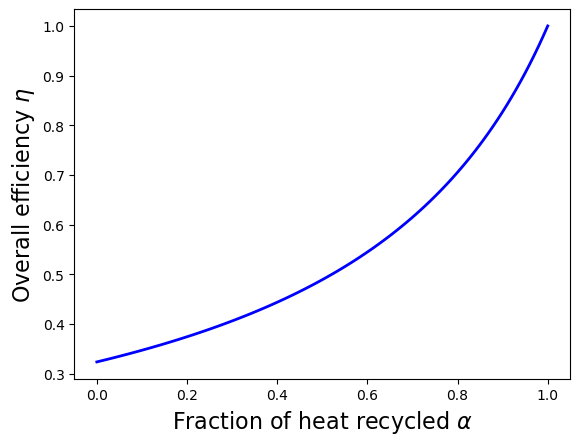

In [10]:
# setup alpha array - we are going to calculate eta for different values of alpha
alpha_array = collect(range(0,stop=1.0,length=100))
eta_array = Array{Float64,1}()
for alpha_value in alpha_array
    
    # compute eta -
    eta_value = -1*(DH32)/(DH21 - alpha_value*abs(DH43))
    
    # grab -
    push!(eta_array,eta_value)
end

# lets's plot alpha (x-axis) versus eta (y-axis)
plot(alpha_array,eta_array,"b",lw=2)
xlabel(L"Fraction of heat recycled $\alpha$", fontsize=16);
ylabel(L"Overall efficiency $\eta$", fontsize=16);